In [1]:
from mpe2 import simple_spread_v3
from pettingzoo.utils.conversions import aec_to_parallel
from failure_api.communication_models.delay_based_model import DelayBasedModel
from failure_api.wrappers.communication_wrapper import CommunicationWrapper
from failure_api.communication_models.active_communication import ActiveCommunication

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

env = simple_spread_v3.env(N=3, local_ratio=0.5)
agents_id = env.possible_agents

model = DelayBasedModel(
    agent_ids=agents_id,
    min_delay=1,
    max_delay=1,
    message_drop_probability=0.0
)

wrapped_env = CommunicationWrapper(env, failure_models=[model])
par_env = aec_to_parallel(wrapped_env)
observations, infos = par_env.reset()

observations, infos = par_env.reset()

for t in range(10):
    print(f"\n--- Step {t} ---")
    
    print("Before:")
    print(wrapped_env.comms_matrix.matrix.astype(int))

    actions = {agent: par_env.action_space(agent).sample() for agent in par_env.agents}
    observations, rewards, terminations, truncations, infos = par_env.step(actions)

    print("After:")
    print(wrapped_env.comms_matrix.matrix.astype(int))

# Optionally print final queues
print("\nFinal Queues:")
for (s, r), q in model.message_queues.items():
    print(f"{s} → {r}: {list(q)}")


    



Matrix update: agent_0 → agent_1 = 0.0
Matrix update: agent_0 → agent_2 = 0.0
Matrix update: agent_1 → agent_0 = 0.0
Matrix update: agent_1 → agent_2 = 0.0
Matrix update: agent_2 → agent_0 = 0.0
Matrix update: agent_2 → agent_1 = 0.0
Delivered: agent_0 → agent_1, flag: 1.0
Matrix update: agent_0 → agent_1 = 1.0
Delivered: agent_0 → agent_2, flag: 1.0
Matrix update: agent_0 → agent_2 = 1.0
Delivered: agent_1 → agent_0, flag: 1.0
Matrix update: agent_1 → agent_0 = 1.0
Delivered: agent_1 → agent_2, flag: 1.0
Matrix update: agent_1 → agent_2 = 1.0
Delivered: agent_2 → agent_0, flag: 1.0
Matrix update: agent_2 → agent_0 = 1.0
Delivered: agent_2 → agent_1, flag: 1.0
Matrix update: agent_2 → agent_1 = 1.0
Matrix update: agent_0 → agent_1 = 0.0
Matrix update: agent_0 → agent_2 = 0.0
Matrix update: agent_1 → agent_0 = 0.0
Matrix update: agent_1 → agent_2 = 0.0
Matrix update: agent_2 → agent_0 = 0.0
Matrix update: agent_2 → agent_1 = 0.0
Delivered: agent_0 → agent_1, flag: 1.0
Matrix update: age

In [3]:
print(id(wrapped_env.comms_matrix))
print(id(comms_matrix_in_model_call))



1928634868688


NameError: name 'comms_matrix_in_model_call' is not defined

In [1]:
import numpy as np

class CommMatrixLogger:
    def __init__(self, agent_ids):
        self.agent_ids = agent_ids
        self.last_matrix = None

    def log(self, matrix, step_label=""):
        matrix = np.array(matrix)
        print(f"\n--- {step_label} ---")
        print("Matrix:")
        header = "      " + "  ".join(f"{aid:>8}" for aid in self.agent_ids)
        print(header)

        for i, row in enumerate(matrix):
            row_str = f"{self.agent_ids[i]:>6} " + "  ".join(f"{int(val):>8}" for val in row)
            print(row_str)

        if self.last_matrix is not None:
            self._log_deltas(matrix)

        self.last_matrix = matrix.copy()

    def _log_deltas(self, new_matrix):
        print("\nChanges (Δ):")
        for i, row in enumerate(new_matrix):
            for j, val in enumerate(row):
                old_val = self.last_matrix[i][j]
                if old_val != val:
                    print(f"  {self.agent_ids[i]} → {self.agent_ids[j]}: {int(old_val)} → {int(val)}")


In [2]:
from mpe2 import simple_spread_v3
from failure_api.communication_models.delay_based_model import DelayBasedModel
from failure_api.wrappers.communication_wrapper import CommunicationWrapper
from pettingzoo.utils.conversions import aec_to_parallel, parallel_to_aec

env = simple_spread_v3.env(N=3, local_ratio=0.5)
agent_ids = env.possible_agents

model = DelayBasedModel(
    agent_ids=agent_ids,
    min_delay=2,
    max_delay=4,
    message_drop_probability=0.0
)

wrapped_env = CommunicationWrapper(env, failure_models=[model])
par_env = aec_to_parallel(wrapped_env)
aec_env = parallel_to_aec(par_env)

observations, infos = par_env.reset()
logger = CommMatrixLogger(agent_ids)

for t in range(10):
    logger.log(wrapped_env.comms_matrix.matrix, step_label=f"Step {t} (Before)")

    # Step only one agent manually
    agent = aec_env.agent_selection
    action = aec_env.action_space(agent).sample()
    aec_env.step(action)  # This will invoke wrapper.step and update connectivity

    logger.log(wrapped_env.comms_matrix.matrix, step_label=f"Step {t} (After)")



--- Step 0 (Before) ---
Matrix:
       agent_0   agent_1   agent_2
agent_0        1         1         1
agent_1        1         1         1
agent_2        1         0         1

--- Step 0 (After) ---
Matrix:
       agent_0   agent_1   agent_2
agent_0        1         1         0
agent_1        0         1         1
agent_2        0         1         1

Changes (Δ):
  agent_0 → agent_2: 1 → 0
  agent_1 → agent_0: 1 → 0
  agent_2 → agent_0: 1 → 0
  agent_2 → agent_1: 0 → 1

--- Step 1 (Before) ---
Matrix:
       agent_0   agent_1   agent_2
agent_0        1         1         0
agent_1        0         1         1
agent_2        0         1         1

Changes (Δ):

--- Step 1 (After) ---
Matrix:
       agent_0   agent_1   agent_2
agent_0        1         1         1
agent_1        0         1         1
agent_2        0         0         1

Changes (Δ):
  agent_0 → agent_2: 0 → 1
  agent_2 → agent_1: 1 → 0

--- Step 2 (Before) ---
Matrix:
       agent_0   agent_1   agent_2
agent_0       

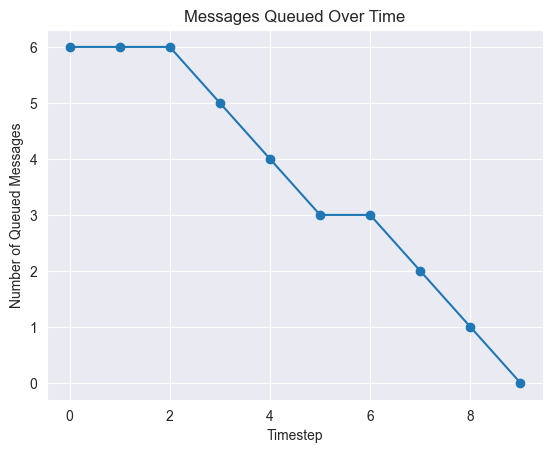

In [3]:
import matplotlib.pyplot as plt

timesteps = list(range(10))
queued_counts = [6, 6, 6, 5, 4, 3, 3, 2, 1, 0]  # Sample data

plt.plot(timesteps, queued_counts, marker='o')
plt.title("Messages Queued Over Time")
plt.xlabel("Timestep")
plt.ylabel("Number of Queued Messages")
plt.grid(True)
plt.show()


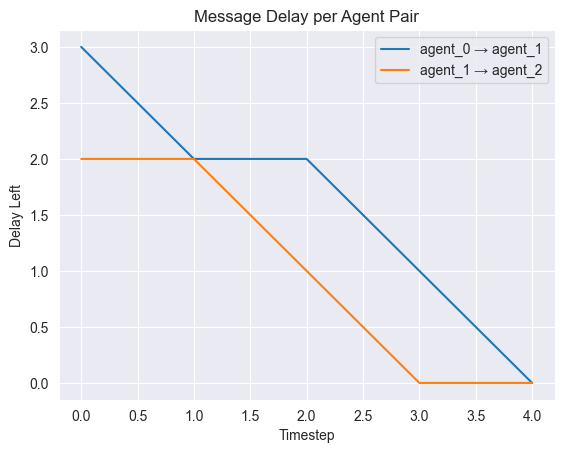

In [5]:
history = {
    ('agent_0', 'agent_1'): [3, 2, 2, 1, 0],
    ('agent_1', 'agent_2'): [2, 2, 1, 0, 0]
}

for (s, r), delays in history.items():
    plt.plot(range(len(delays)), delays, label=f"{s} → {r}")

plt.title("Message Delay per Agent Pair")
plt.xlabel("Timestep")
plt.ylabel("Delay Left")
plt.legend()
plt.grid(True)
plt.show()

